In [337]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor

import matplotlib.pyplot as plt

In [304]:

file_path = 'D:\year-3\ML\project\insurance.csv'

ds = pd.read_csv(file_path)

ds.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [305]:
x_input=ds.drop('charges',axis='columns')
y_target=ds['charges']
x_input.head()


,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest


In [306]:
y_target.head()


0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [307]:
ds.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [308]:
smoker_values = pd.get_dummies(X['smoker'], prefix='smoker')
x_input=pd.concat([x_input,smoker_values], axis='columns')
x_input=x_input.drop('smoker',axis='columns')
x_input


,age,sex,bmi,children,region,smoker_no,smoker_yes
0,19,female,27.900,0,southwest,False,True
1,18,male,33.770,1,southeast,True,False
2,28,male,33.000,3,southeast,True,False
3,33,male,22.705,0,northwest,True,False
4,32,male,28.880,0,northwest,True,False
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,northwest,True,False
1334,18,female,31.920,0,northeast,True,False
1335,18,female,36.850,0,southeast,True,False
1336,21,female,25.800,0,southwest,True,False


In [309]:
region_values=pd.get_dummies(x_input['region'],prefix='region')
x_input=pd.concat([x_input,region_values], axis='columns')
x_input = x_input.drop('region', axis = 'columns')
region_values


,region_northeast,region_northwest,region_southeast,region_southwest
0,False,False,False,True
1,False,False,True,False
2,False,False,True,False
3,False,True,False,False
4,False,True,False,False
...,...,...,...,...
1333,False,True,False,False
1334,True,False,False,False
1335,False,False,True,False
1336,False,False,False,True


In [310]:
sex_values = pd.get_dummies(x_input['sex'], prefix = 'sex')
x_input= pd.concat([x_input, sex_values], axis = 'columns')
x_input = x_input.drop('sex', axis = 'columns')
sex_values

,sex_female,sex_male
0,True,False
1,False,True
2,False,True
3,False,True
4,False,True
...,...,...
1333,False,True
1334,True,False
1335,True,False
1336,True,False


In [311]:
ts = 1000 / ds.shape[0]
print(train_size * ds.shape[0])

1000.0


In [312]:
x_train,x_test,y_train,y_test = train_test_split(x_input,y_target,train_size = ts ,random_state = 42)

In [313]:
scale = StandardScaler()
x_train[['age','bmi','children']]=scale.fit_transform(x_train[['age','bmi','children']])
x_test[['age','bmi','children']]=scale.transform(x_test[['age','bmi','children']])

In [314]:
print(x_train.at[1,'smoker_no'])
print(x_input.shape)
print(x_input.at[0,'smoker_no'])
print(x_train.shape)
print(x_test.shape)



True
(1338, 11)
False
(1000, 11)
(338, 11)


In [315]:
linearmodel = SGDRegressor(max_iter=1000, alpha=0.01, random_state=42)
linearmodel.fit(x_train, y_train)

predict_test_linear = linearmodel.predict(x_test)
mse_test_linear = mean_squared_error(y_test, predict_test_linear)
print("Mean Squared Error on test Set",mse_test_linear )

linearmodel_r2 = r2_score(y_test,predict_test_linear)
print("r^2 score test Set",linearmodel_r2 *100,'%' )


Mean Squared Error on test Set 35203156.8454104
r^2 score test Set 76.55952339790706 %


In [330]:
treemodel = DecisionTreeRegressor(max_depth=None, min_samples_split=71)
treemodel.fit(x_train, y_train)

predict_test_tree = treemodel.predict(x_test)
mse_test_tree = mean_squared_error(y_test, predict_test_tree)
print("Mean Squared Error on test Set",mse_test_tree )

treemodel_r2 = r2_score(y_test,predict_test_tree)
print("r^2 score test Set",treemodel_r2 *100,'%' )


Mean Squared Error on test Set 22988152.125285834
r^2 score test Set 84.69304203641701 %


In [335]:
boostmodel = GradientBoostingRegressor(n_estimators=130, learning_rate=0.04, random_state=42)
boostmodel.fit(x_train, y_train)


predict_test_boost = boostmodel.predict(x_test)
mse_test_boost = mean_squared_error(y_test, predict_test_boost)
print("Mean Squared Error on test Set",mse_test_boost )

boostmodel_r2 = r2_score(y_test,predict_test_boost)
print("r^2 score test Set",boostmodel_r2 *100,'%' )

Mean Squared Error on test Set 20257952.988891855
r^2 score test Set 86.51098038940994 %


In [344]:
def draw (X , model) :
    actual_values = y_test
    predicted_values = X

    plt.scatter(actual_values, predicted_values, color='blue', marker='o', label='Actual vs. Predicted')

    plt.plot([min(actual_values), max(actual_values)], [min(actual_values), max(actual_values)], color='red', linestyle='--', linewidth=2, label='Perfect Prediction')

    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Actual vs. Predicted Values for ' +model )
    plt.legend()

    plt.show()





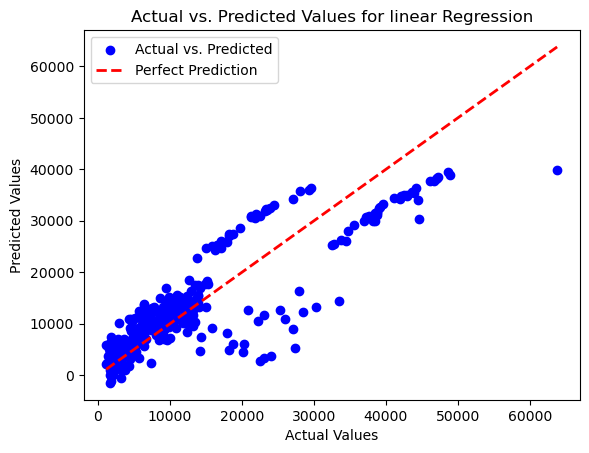

In [345]:
draw (predict_test_linear, 'linear Regression')

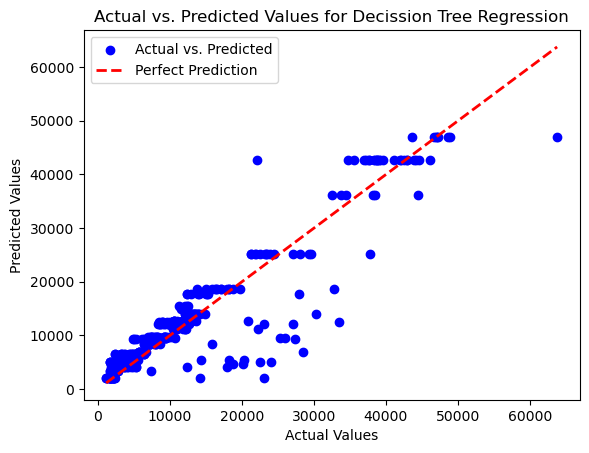

In [346]:
draw (predict_test_tree, 'Decission Tree Regression')

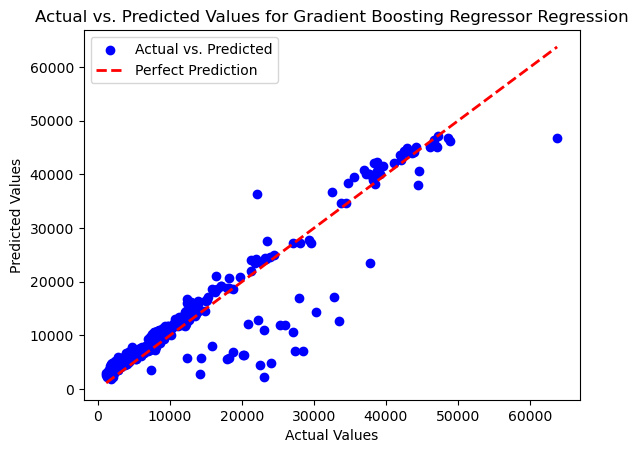

In [347]:
draw (predict_test_boost, 'Gradient Boosting Regressor Regression')